In [29]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
import re
import nltk
import string
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
stopword = set(stopwords.words("english"))

In [31]:
# importing the dataset
df = pd.read_csv("cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


<Axes: xlabel='cyberbullying_type'>

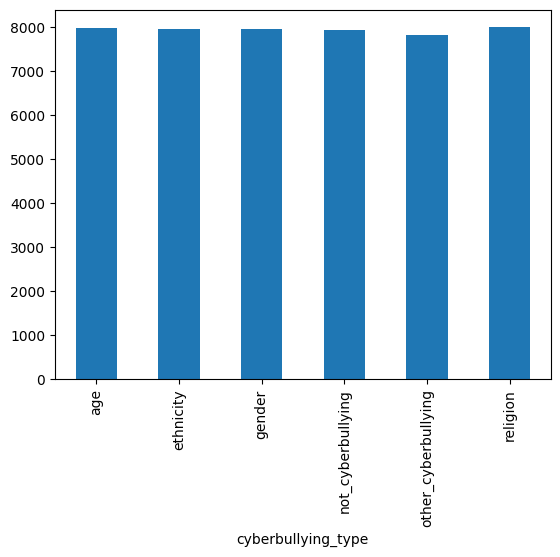

In [32]:
df['cyberbullying_type'].value_counts().sort_index().plot.bar()

In [33]:
def clean(text):
    text = str(text).lower()
    text= re.sub('\[.*?\]', '', text)
    #cleaning and removal of urls
    text= re.sub('http?://\S+|www\.\S+','',text)
    text= re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text= [word for word in text.split(' ') if word not in stopword]
    text =" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text =" ".join(text)
    return text 
df["tweet_text"] = df["tweet_text"].apply(clean)
print (df.head())

                                          tweet_text cyberbullying_type
0                 word katandandr food crapilici mkr  not_cyberbullying
1  aussietv white mkr theblock imacelebrityau tod...  not_cyberbullying
2       xochitlsuckkk classi whore red velvet cupcak  not_cyberbullying
3  jasongio meh p  thank head concern anoth angri...  not_cyberbullying
4  rudhoeenglish isi account pretend kurdish acco...  not_cyberbullying


In [34]:
x = np.array(df["tweet_text"])
y = np.array(df["cyberbullying_type"])
cv = CountVectorizer()
x= cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7942690132791156


In [38]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


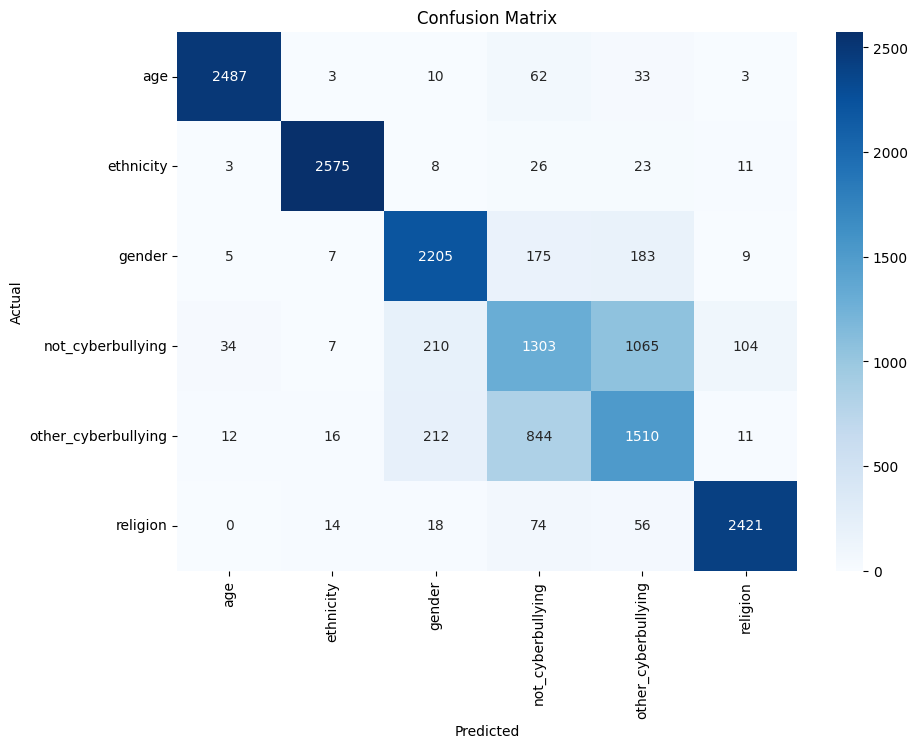

In [39]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
                      precision    recall  f1-score   support

                age       0.98      0.96      0.97      2598
          ethnicity       0.98      0.97      0.98      2646
             gender       0.83      0.85      0.84      2584
  not_cyberbullying       0.52      0.48      0.50      2723
other_cyberbullying       0.53      0.58      0.55      2605
           religion       0.95      0.94      0.94      2583

           accuracy                           0.79     15739
          macro avg       0.80      0.80      0.80     15739
       weighted avg       0.80      0.79      0.79     15739

